# Sign Language Recognition and Translation

## NLP-BhaskarjyotiDas Class of 2018

### 01FB15ECS285 - Shreyas Miraj
### 01FB15ECS290 - Siddharth Ganesan

## Language model enhancer

In [2]:
import numpy as np
import time
import ast
import nltk
import random
import pandas as pd
from string import ascii_lowercase
from nltk.corpus import brown
from nltk.corpus import reuters
from collections import deque
from nltk.corpus import words
import re
from collections import Counter
from nltk.corpus import stopwords
from os import path
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [3]:
def words(text):
    return re.findall(r'\w+', text.lower())

In [4]:
WORDS = Counter(words(open('big.txt').read()))

In [5]:
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

In [6]:
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

In [7]:
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])


In [8]:
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

In [9]:
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

In [10]:
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [11]:
def spell_check(enhance_list):
    spell_checked_list = []
    if(correct_word == 1):
        spell_checked_list = enhance_list
    else:
        for word in enhance_list:
            spell_checked_list.append(correction(word))
    return spell_checked_list


In [12]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [13]:
#finds the most probable word from the list of words given by the image
#classifier
correct_word = 0

def probable_word_list(class_input):
    global correct_word
    
    result = {}
    result_correct = []
    print("begining check...")
    
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    
    for word in img_classifier_output:
        if(word in english_vocab):
            correct_word = 1
            result_correct.append(word)
   
    if(correct_word == 0):
        print("finding least distance...")
        for word in img_classifier_output:
            wordlist = set(brown.words())
            i = 0
            minimum_gb = 0
            for actual_word in english_vocab:
                print("finding distance with: ", actual_word)
                minDist = levenshtein(word,actual_word)
                if(i==0):
                    i = 1
                    minimum_gb = minDist
                    result[minimum_gb] = [word]
                elif(minDist < minimum_gb):
                        result.pop(minimum_gb,None)
                        minimum_gb = minDist
                        result[minimum_gb] = [word]
                elif(minDist == minimum_gb):
                        result[minimum_gb].append(word)
    print("Finished Check :)")
    
    if(correct_word == 1):
        return result_correct
    else:
        return result.values()

In [14]:
#Sentiment analysis using NRC emotion lexicon

def sentiment_analysis(word_list):
    
    nrc_lex = pd.read_csv( "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt",sep='\t', names=['word','emotion','association'])
    print ("\n NRC Emotion lexicon loaded...")

    #remove the metadata
    nrc_lex = nrc_lex[21:]
    
    sentiment_enhanced_dict = {}
    sentiment_enhanced_dict['anger'] = []
    sentiment_enhanced_dict['fear'] = []
    sentiment_enhanced_dict['anticipation'] = []
    sentiment_enhanced_dict['trust'] = []
    sentiment_enhanced_dict['surprise'] = []
    sentiment_enhanced_dict['sadness'] = []
    sentiment_enhanced_dict['disgust'] = []
    sentiment_enhanced_dict['joy'] = []
    
    for word in word_list:
        if nrc_lex['word'].str.contains(word).any():

            anger_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='anger'][nrc_lex['association'] == 1].index.tolist()
            if len(anger_list) == 1:
                sentiment_enhanced_dict['anger'].append(word)
            fear_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='fear'][nrc_lex['association'] == 1].index.tolist()
            if len(fear_list) == 1:
                sentiment_enhanced_dict['fear'].append(word)
            anticipation_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='anticipation'][nrc_lex['association'] == 1].index.tolist()
            if len(anticipation_list) == 1:
                sentiment_enhanced_dict['anticipation'].append(word)
            trust_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='trust'][nrc_lex['association'] == 1].index.tolist()
            if len(trust_list) == 1:
                sentiment_enhanced_dict['trust'].append(word)
            surprise_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='surprise'][nrc_lex['association'] == 1].index.tolist()
            if len(surprise_list) == 1:
                sentiment_enhanced_dict['surprise'].append(word)
            sadness_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='sadness'][nrc_lex['association'] == 1].index.tolist()
            if len(sadness_list) == 1:
                sentiment_enhanced_dict['sadness'].append(word)
            joy_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='joy'][nrc_lex['association'] == 1].index.tolist()
            if len(joy_list) == 1:
                sentiment_enhanced_dict['joy'].append(word)
            disgust_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='disgust'][nrc_lex['association'] == 1].index.tolist()
            if len(disgust_list) == 1:
                sentiment_enhanced_dict['disgust'].append(word)
                
    return sentiment_enhanced_dict

In [15]:
f = open("img_class_output.txt","r")
###
# We still haven't acquired a dataset with 
# images conisiting of paired facial expression and hand gestures
# So we feed the model with one of the eight emotions
# viz: anger, fear, anticipation, trust, surprise, sadness, joy, disgust
###
emotion_received = ['surprise','joy']

img_classifier_output  = f.read().split('\n')
len(img_classifier_output)
img_classifier_output

enhanced_list = probable_word_list(img_classifier_output)
len(enhanced_list)
enhanced_list

#parse it through spell checker
spell_checked_list = spell_check(enhanced_list)


sentiment_enhanced_dict = sentiment_analysis(enhanced_list)

sentiment_enhanced_list = []
for word in emotion_received:
    for word2 in sentiment_enhanced_dict[word]:
        sentiment_enhanced_list.append(word2)

begining check...
Finished Check :)

 NRC Emotion lexicon loaded...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

In [17]:
enhanced_list_size = len(enhanced_list)
classifier_output_size = len(img_classifier_output)
sentiment_enhanced_size = len(sentiment_enhanced_list)

In [18]:
img_classifier_output

['qretty',
 'qretti',
 'qrettn',
 'qrette',
 'qretts',
 'qretmy',
 'qretmi',
 'qretmn',
 'qretme',
 'qretms',
 'qretny',
 'qretni',
 'qretnn',
 'qretne',
 'qretns',
 'qretxy',
 'qretxi',
 'qretxn',
 'qretxe',
 'qretxs',
 'qretoy',
 'qretoi',
 'qreton',
 'qretoe',
 'qretos',
 'qremty',
 'qremti',
 'qremtn',
 'qremte',
 'qremts',
 'qremmy',
 'qremmi',
 'qremmn',
 'qremme',
 'qremms',
 'qremny',
 'qremni',
 'qremnn',
 'qremne',
 'qremns',
 'qremxy',
 'qremxi',
 'qremxn',
 'qremxe',
 'qremxs',
 'qremoy',
 'qremoi',
 'qremon',
 'qremoe',
 'qremos',
 'qreqty',
 'qreqti',
 'qreqtn',
 'qreqte',
 'qreqts',
 'qreqmy',
 'qreqmi',
 'qreqmn',
 'qreqme',
 'qreqms',
 'qreqny',
 'qreqni',
 'qreqnn',
 'qreqne',
 'qreqns',
 'qreqxy',
 'qreqxi',
 'qreqxn',
 'qreqxe',
 'qreqxs',
 'qreqoy',
 'qreqoi',
 'qreqon',
 'qreqoe',
 'qreqos',
 'qrexty',
 'qrexti',
 'qrextn',
 'qrexte',
 'qrexts',
 'qrexmy',
 'qrexmi',
 'qrexmn',
 'qrexme',
 'qrexms',
 'qrexny',
 'qrexni',
 'qrexnn',
 'qrexne',
 'qrexns',
 'qrexxy',

In [19]:
enhanced_list

['pretty', 'triton']

In [20]:
sentiment_enhanced_list

['pretty']

In [21]:
print("Number of outputs generated by the image classifier: ",classifier_output_size)
print("Number of outputs generated by the language enhanced model: ",enhanced_list_size)
print("Number of outputs generated by the sentiment enabled language model: ",sentiment_enhanced_size)

Number of outputs generated by the image classifier:  15626
Number of outputs generated by the language enhanced model:  2
Number of outputs generated by the sentiment enabled language model:  1


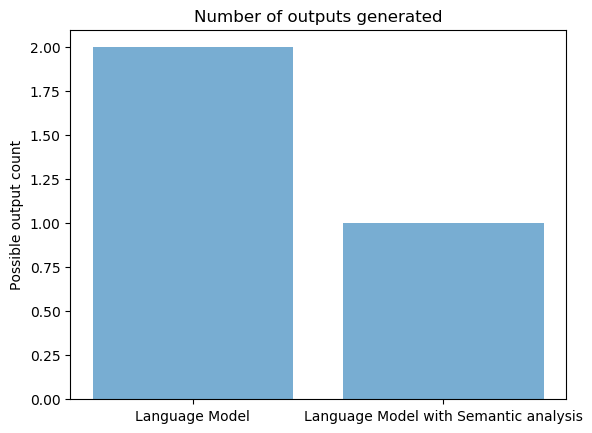

In [182]:
output_type = ('Language Model','Language Model with Semantic analysis')

y_pos = np.arange(len(output_type))
number_of_outputs = [enhanced_list_size,sentiment_enhanced_size]

plt.bar(y_pos, number_of_outputs, align='center', alpha=0.6)
plt.xticks(y_pos, output_type)
plt.ylabel('Possible output count')
plt.title('Number of outputs generated')

plt.show()

In [183]:
print("Number of outputs generated by the image classifier: ",classifier_output_size)
print("Number of outputs generated by the language enhanced model: ",enhanced_list_size)
print("Number of outputs generated by the sentiment enabled language model: ",sentiment_enhanced_size)

Number of outputs generated by the image classifier:  15214
Number of outputs generated by the language enhanced model:  2
Number of outputs generated by the sentiment enabled language model:  1
